# Convolutional Neural Networks

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    fruit_files = np.array(data['filenames'])
    fruit_targets = np_utils.to_categorical(np.array(data['target']), 95)
    return fruit_files, fruit_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('./fruits-360/Training')
test_files_raw, test_targets_raw = load_dataset('./fruits-360/Test')

pos = round(len(test_files_raw) / 2)
valid_files, valid_targets = test_files_raw[:pos], test_targets_raw[:pos]
test_files, test_targets = test_files_raw[pos:], test_targets_raw[pos:]

# load list of dog names
fruit_names = [item[20:-1] for item in sorted(glob("./fruits-360/Training/*/"))]

# print statistics about the dataset
print('There are %d total fruit categories.' % len(fruit_names))
print('There are %s total fruit images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training fruit images.' % len(train_files))
print('There are %d validation fruit images.' % len(valid_files))
print('There are %d test fruit images.'% len(test_files))

Using TensorFlow backend.


There are 95 total fruit categories.
There are 65326 total fruit images.

There are 48905 training fruit images.
There are 8210 validation fruit images.
There are 8211 test fruit images.


In [22]:
import random
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(100, 100))
    # convert PIL.Image.Image type to 3D tensor with shape (100, 100, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 100, 100, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

In [4]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

## Create a CNN to Classify Fruits (from Scratch)

In [5]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 8211/8211 [00:06<00:00, 1357.07it/s]


In [6]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(95, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       32896     
__________

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [8]:
from keras.callbacks import ModelCheckpoint  

epochs = 10

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=0, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 48905 samples, validate on 8210 samples
Epoch 1/10
48905/48905 [==============================] - 491s 10ms/step - loss: 1.2786 - acc: 0.6225 - val_loss: 0.9803 - val_acc: 0.7140
Epoch 2/10
48905/48905 [==============================] - 485s 10ms/step - loss: 0.3396 - acc: 0.8913 - val_loss: 0.9508 - val_acc: 0.7162
Epoch 3/10
48905/48905 [==============================] - 486s 10ms/step - loss: 0.1782 - acc: 0.9409 - val_loss: 0.3816 - val_acc: 0.8993
Epoch 4/10
48905/48905 [==============================] - 485s 10ms/step - loss: 0.1200 - acc: 0.9617 - val_loss: 0.1511 - val_acc: 0.9519
Epoch 5/10
48905/48905 [==============================] - 484s 10ms/step - loss: 0.0876 - acc: 0.9729 - val_loss: 0.0951 - val_acc: 0.9709
Epoch 6/10
48905/48905 [==============================] - 483s 10ms/step - loss: 0.0710 - acc: 0.9780 - val_loss: 0.1547 - val_acc: 0.9579
Epoch 7/10
48905/48905 [==============================] - 481s 10ms/step - loss: 0.0588 - acc: 0.9829 - val_loss: 0.0

## Testing

In [9]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

In [10]:
# get index of predicted fruit for each image in test set
fruit_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(fruit_predictions)==np.argmax(test_targets, axis=1))/len(fruit_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 99.3058%


In [35]:
def make_prediction():
    idx = random.randint(0, len(test_targets))
    predicted_label = np.argmax(model.predict(np.expand_dims(test_tensors[idx], axis=0)))
    print ("Predicted label: {}".format(fruit_names[predicted_label]))
    plt.imshow(test_tensors[idx].reshape((100,100,3)))

Predicted label: g/Pomegranate


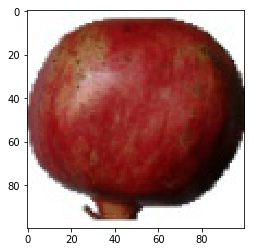

In [46]:
make_prediction()

Predicted label: g/Pear


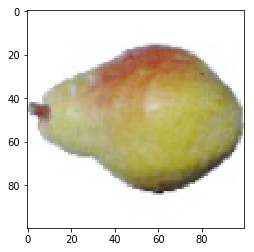

In [51]:
make_prediction()

Predicted label: g/Walnut


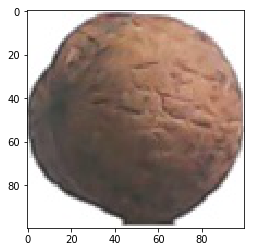

In [45]:
make_prediction()